<a href="https://colab.research.google.com/github/premkumar25/Breast-Cancer-Prediction/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('data.csv',index_col='id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

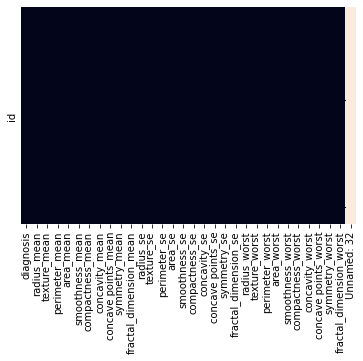

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [15]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [16]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

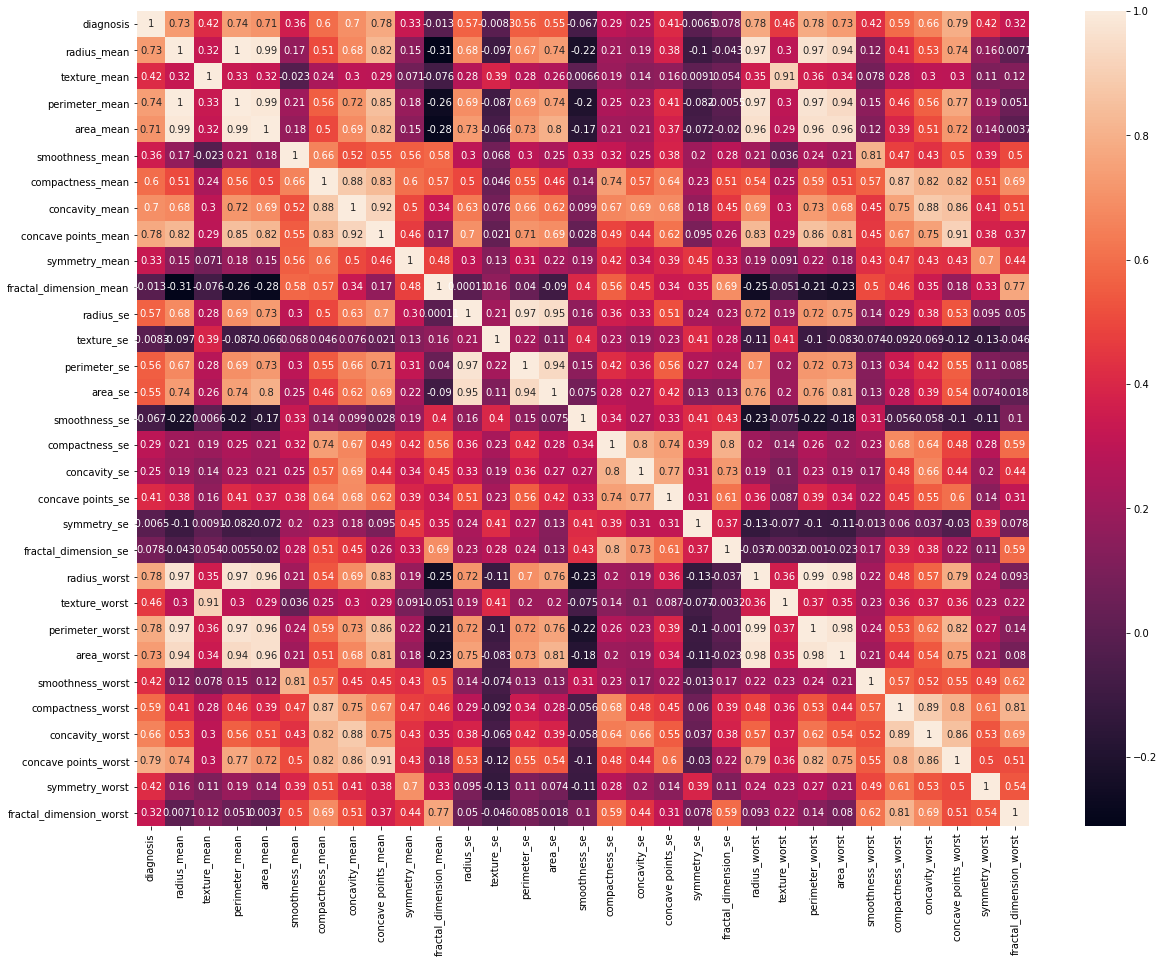

In [18]:
df_corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True)

fractal_dimension_mean, fractal_dimension_se, symmetry_se, smoothness_se, texture_se has very low corelation value with the dependent feature. So these features can be dropped

In [19]:
df_copy = df.copy()

In [28]:
low_corr = ['fractal_dimension_mean', 'fractal_dimension_se', 'symmetry_se', 'smoothness_se', 'texture_se']
df.drop(low_corr,axis=1,inplace=True)

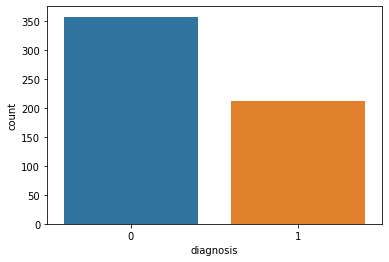

In [29]:
sns.countplot(df['diagnosis'])

Checked for imbalance of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8fdbfdeb8>,
      dtype=object)

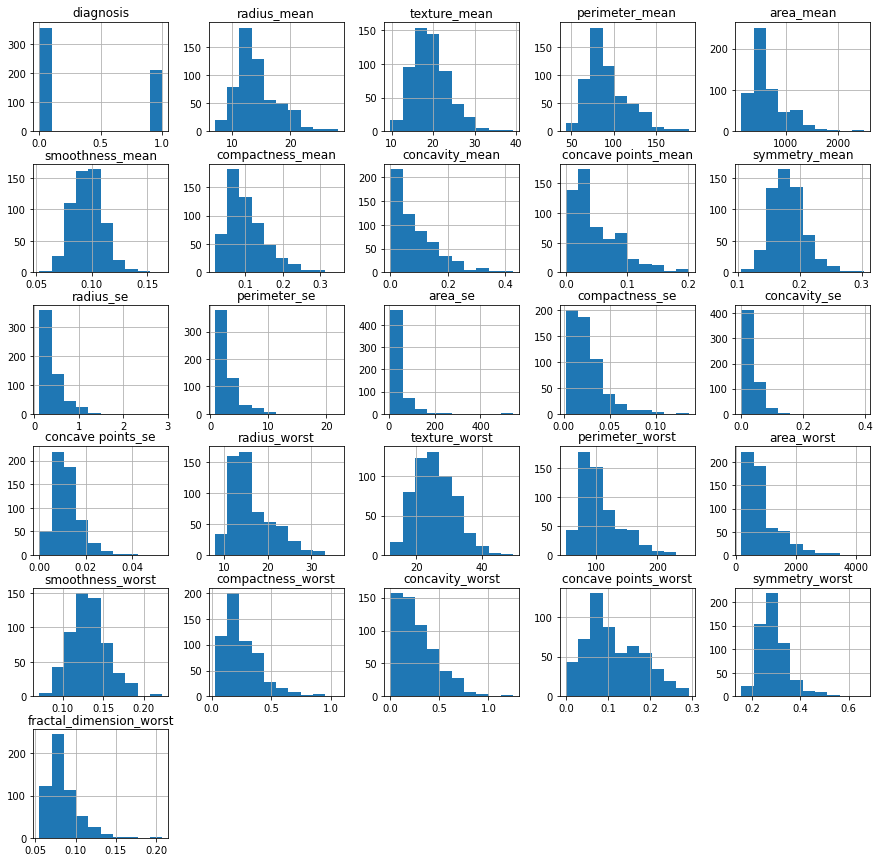

In [30]:
df.hist(figsize=(15,15))

## Import Models

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
source= df.drop('diagnosis',axis=1)
target = df['diagnosis']

In [33]:
clf = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), XGBClassifier()]

for i in clf:
  score = cross_val_score(i,source, target, scoring='accuracy')
  print(i,'\nAccuracy is',score.mean()*100)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
Accuracy is 95.08150908244062
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
Accuracy is 91.9111939139885
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nod

XGB classifier has the highest accuracy



In [34]:
X_train,X_test,y_train,y_test = train_test_split(source,target,test_size=0.33)

In [35]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [36]:
score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(score)
print(cm)

0.9521276595744681
[[124   2]
 [  7  55]]


## Hyperparameter tuning

In [37]:
param = {
    'base_score':[0.1,0.25,0.5,0.75,1],
    'max_depth':[1,3,5,7],
    'booster':['gbtree','gblinear'],
    'n_estimators':[100,200,300,500,700,900,1100],
    'learning_rate':[0.1,0.25,0.5,0.75]
}

In [38]:
estimator = RandomizedSearchCV(estimator=classifier, param_distributions=param,cv=10,scoring='accuracy')
estimator.fit(source,target)
estimator.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
cls = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
cls.fit(X_train,y_train)
y_result = cls.predict(X_test)

scr = accuracy_score(y_test,y_result)
c = confusion_matrix(y_test,y_result)
print(scr)
print(c)

0.9574468085106383
[[125   1]
 [  7  55]]


Accuracy increased after hyperparameter tuning